# Deep Learning: Ejercicios de mitad de curso
### Junio 2021

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def mse(target, prediction):
    return np.sum((target - prediction) ** 2) / target.size

#### 3. Deep Learning y Regularización

<p style='text-align: justify;'>
$a.$ Crear un dataset sintético con 10,000 muestras a partir de la siguiente expresión, donde N es una normal de media cero y desvío 0.2. Utilizar 80% de los datos para entrenamiento y 20% de los datos para testing.
<p>
    
<p style='text-align: center;'>
$\Large y = (x - 2)^2 + 3 + N$
<p>

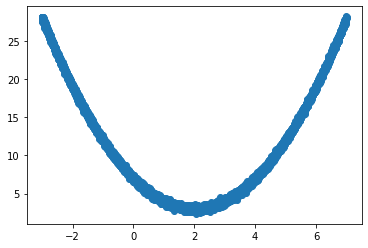

In [20]:
x = np.arange(-3, 7, 0.001)
N = np.random.normal(0, 0.2, 10000)
y = (x-2)**2+3+N
fig, ax = plt.subplots(1,1)
ax.scatter(x, y)

In [21]:
x_train = np.zeros((int(0.8 *len(x)),3))
x_test = np.zeros((int(0.2*len(x)),3))

print(x_train.shape)
print(x_test.shape)

(8000, 3)
(2000, 3)


In [22]:
idx = np.random.permutation(np.arange(0, 10000))

x_train[:,0] = x_train[:,0] + 1
x_test[:,0] = x_test[:,0] + 1

x_train[:,1] = x[idx[0:int(0.8*10000)]]
x_test[:,1] = x[idx[int(0.8*10000):]]

x_train[:,2] = x[idx[0:int(0.8*10000)]]**2
x_test[:,2] = x[idx[int(0.8*10000):]]**2

N_train = N[idx[0:int(0.8*10000)]]
N_test = N[idx[int(0.8*10000):]]

y_train = (x_train[:,1] - 2)**2 + 3 + N_train
y_test = (x_test[:,1] - 2)**2 + 3 + N_test

In [23]:
x_train[0:5,:]

array([[ 1.      ,  0.132   ,  0.017424],
       [ 1.      , -0.731   ,  0.534361],
       [ 1.      ,  1.805   ,  3.258025],
       [ 1.      ,  0.178   ,  0.031684],
       [ 1.      , -0.259   ,  0.067081]])

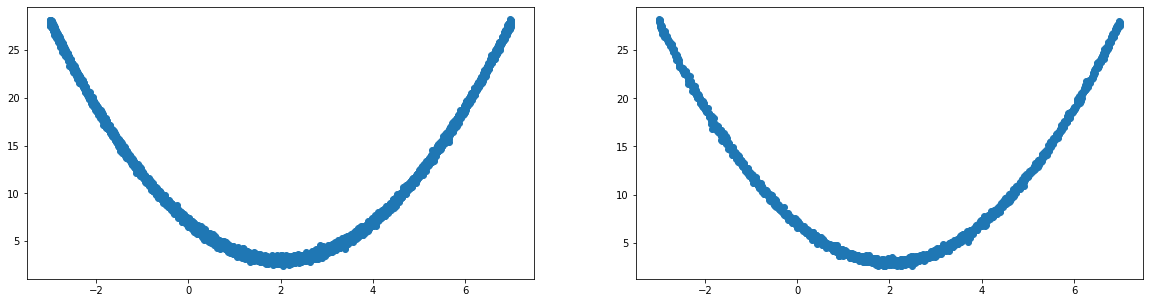

In [24]:
fig, ax = plt.subplots(1,2, figsize= (20,5))
ax[0].scatter(x_train[:,1], y_train)
ax[1].scatter(x_test[:,1], y_test)

In [25]:
print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(8000, 3)
(2000, 3)
(8000,)
(2000,)


<p style='text-align: justify;'>
$b.$ Suponer que se tiene un modelo, tal que la relación entre la salida y la entrada está dada por la ecuación presentada a continuación.
    
Suponiendo que se va a utilizar mini-batch SGD para encontrar los valores óptimos de los pesos w1, w2 y w3 tal que minimizan el ECM (Error Cuadrático Medio) (el ECM es la función de costo para este problema), ¿cuál sería la regla de actualización de cada parámetro?.
    
Implementar el algoritmo en Python (usar mini-batch), encontrar los valores óptimos para w1, w2 y w3 y reportar ECM sobre dataset de entrenamiento y dataset de testing
<p>
    
<p style='text-align: center;'>
$\Large \hat{y} = w_1 . x^{2} + w_2 . x + w_3$
<p>

<p style='text-align: justify;'>
La actualizacion de los pesos responden a la siguente expresión:
<p>
    
<p style='text-align: center;'>
$\Large \omega = \omega - \alpha * \bigtriangledown_\omega (\frac{1}{b} \sum \limits _{b} (J(\omega)))$
<p>
 
<p style='text-align: center;'>    
$\Large \omega = \omega - \alpha * \bigtriangledown_w (\frac{1}{b} \sum \limits _{b} (y-(\omega_1 . x^{2} + \omega_2 . x + \omega_3))^2) $
<p>
    
<p style='text-align: center;'>      
$\Large \omega = \omega - \frac{\alpha}{b} * \sum \limits _{b} (-2)*(y-(\omega_1 . x^{2} + \omega_2 . x + \omega_3))*\begin{bmatrix} \frac{\partial \hat y}{\partial \omega_1} \\ \frac{\partial \hat y}{\partial \omega_2} \\ \frac{\partial \hat y}{\partial \omega_3} \end{bmatrix} $
<p>
    
<p style='text-align: center;'>      
$\Large \begin{bmatrix} \omega_1 \\ \omega_2 \\ \omega_3 \end{bmatrix} = \begin{bmatrix} \omega_1 \\ \omega_2 \\ \omega_3 \end{bmatrix} - \frac{(-2) \alpha}{b} * \sum \limits _{b} (y-\hat y)*\begin{bmatrix} x^2 \\ x \\ 1 \end{bmatrix} $
<p>
    
<p style='text-align: justify;'>
Don de $b$ es el batch size.
<p>

In [26]:
def mini_batch_gradient_descent(x_train_mb, y_train_mb, x_test_mb, y_test_mb, lr = 0.01, epochs = 1000, batchs = 16):
    
    n = x_train_mb.shape[0]
    m = x_train_mb.shape[1]
    
    # inicializo pesos de manero aleatoria
    w = np.random.randn(m).reshape(m, 1)

    mse_train = []
    mse_test = []
    
    for epoch in range(epochs):
        idx = np.random.permutation(x_train.shape[0])
        x_train_mb = x_train_mb[idx]
        y_train_mb = y_train_mb[idx]
        
        batch_size = int(len(x_train_mb) / batchs)
        
        for i in range(0, len(x_train_mb), batch_size):
            end = i + batch_size if i + batch_size <= len(x_train_mb) else len(x_train_mb)
            batch_x = x_train_mb[i: end]
            batch_y = y_train_mb[i: end]
            
            batch_y = batch_y.reshape(-1,1)
            
            prediction = np.matmul(batch_x, w)  # nx1
            error = batch_y - prediction  # nx1

            grad_sum = np.sum(error * batch_x, axis=0)
            grad_mul = -2/batch_size * grad_sum  # 1xm
            gradient = np.transpose(grad_mul).reshape(-1, 1)  # mx1

            w = w - (lr * gradient)
        
        mse_train.append(mse(y_train_mb.reshape(-1,1), np.matmul(x_train_mb, w)))
        mse_test.append(mse(y_test_mb.reshape(-1,1), np.matmul(x_test_mb, w)))
        
    e = np.arange(epochs)+1
    plt.figure(figsize=(20,10))
    plt.subplot(1, 1, 1)
    plt.plot(e, mse_train, '--')
    plt.plot(e, mse_test, '-')
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.legend(['Error de entrenamiento', 'Error de validacion'])
    print(f"Error de entrenamiento final {mse_train[epoch]}")
    print(f"Error de testeo final {mse_test[epoch]}")
    return w, mse_train, mse_test

Error de entrenamiento final 0.039641677454456334
Error de testeo final 0.04080047940656235


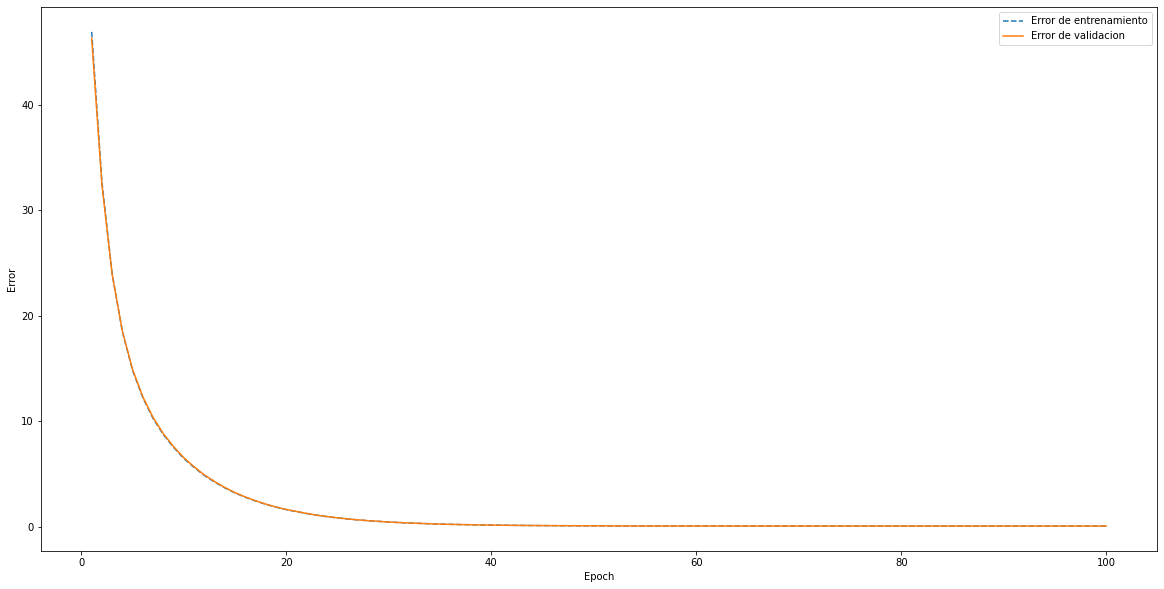

In [32]:
w, mse_train, mse_test = mini_batch_gradient_descent(x_train, y_train,
                                                     x_test, y_test, 
                                                     lr = 0.001, 
                                                     epochs = 100, batchs = 64)

In [33]:
print(f'Pesos finales: {w}')

Pesos finales [[ 6.99689258]
 [-4.00100437]
 [ 1.00008907]]


<p style='text-align: justify;'>
Desarrollando la funcion a estimar tenemos que:
<p>
    
<p style='text-align: center;'>
$\Large y = (x - 2)^2 + 3 + N = (x^2 -2 . 2. x + 2^2) + 3 + N = x^2 - 4x + (7 + N)$
<p>
    
<p style='text-align: justify;'>
Podemos ver que los pesos del termino de segundo y primer orden son muy similares.
<p>

**Probaremos con el dataset normalizado**

In [34]:
x_train_mean = x_train.mean(axis=0)
x_train_var = x_train.var(axis=0)

x_train_norm = x_train.copy()
x_train_norm [:,1:] = (x_train_norm[:,1:]-x_train_mean[1:])/x_train_var[1:]
x_train_norm[:5,:]

array([[ 1.        , -0.22408931, -0.06527559],
       [ 1.        , -0.32719578, -0.06255064],
       [ 1.        , -0.02420853, -0.0481933 ],
       [ 1.        , -0.21859349, -0.06520042],
       [ 1.        , -0.27080383, -0.06501383]])

In [35]:
x_test_mean = x_test.mean(axis=0)
x_test_var = x_test.var(axis=0)

x_test_norm = x_test.copy()
x_test_norm [:,1:] = (x_test_norm[:,1:]-x_train_mean[1:])/x_train_var[1:]
x_test_norm[:5,:]

array([[ 1.        ,  0.1094834 , -0.02029871],
       [ 1.        , -0.50318167, -0.03976132],
       [ 1.        ,  0.10231493, -0.02212934],
       [ 1.        ,  0.23493159,  0.01788104],
       [ 1.        , -0.41238107, -0.05437599]])

Error de entrenamiento final 1.222218993473063
Error de testeo final 1.1748439258200774


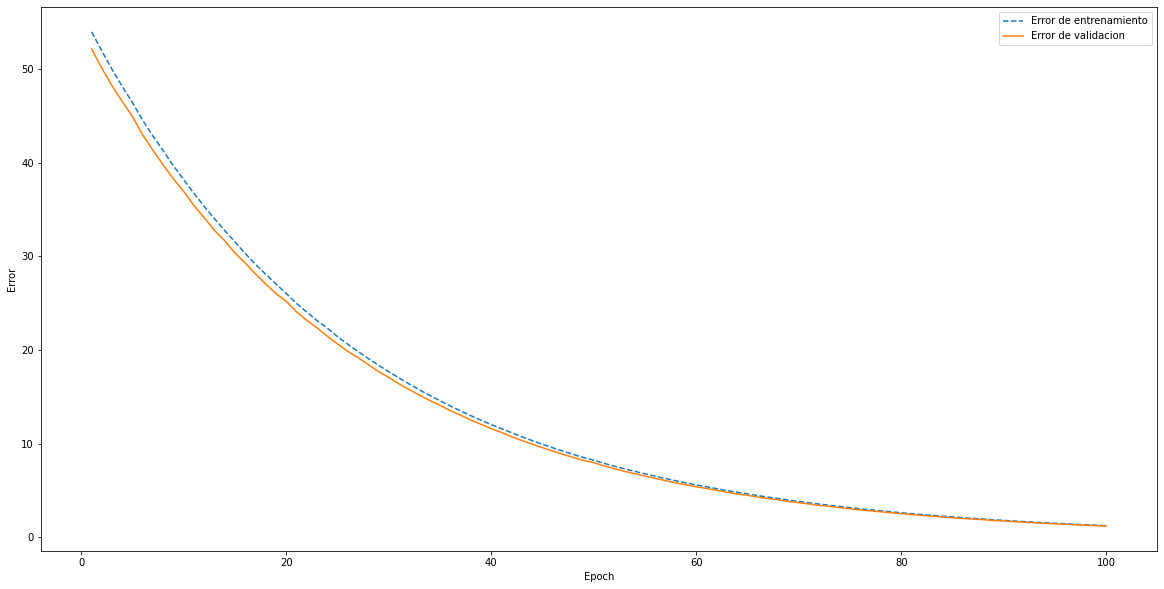

In [43]:
w_norm, mse_train_norm, mse_test_norm = mini_batch_gradient_descent(x_train_norm, y_train,
                                                                    x_test_norm, y_test, 
                                                                    lr = 0.1, 
                                                                    epochs = 100, batchs = 64)

<p style='text-align: justify;'>
$c.$ Ahora se le agrega regularización l2 a la función de costo.
    
¿cómo cambia la regla de actualización de cada parámetro?
    
Implementar el algoritmo en Python (usar mini-batch), encontrar los valores óptimos para w1, w2 y w3 y reportar ECM sobre dataset de entrenamiento y dataset de testing.
    
Seleccionar manualmente los parámetros para el learning rate y para el coeficiente de regularización.
<p>
    

<p style='text-align: justify;'>
La actualizacion de los pesos en Mini-Batch Gradient Descent con regularizacion L2 responden a la siguente expresión:
<p>
    
<p style='text-align: center;'>
$\Large \omega = \omega - \alpha * \bigtriangledown_w (\frac{1}{b} \sum \limits _{b} (J(\omega)))$
<p>

<p style='text-align: justify;'>
Pero en este caso la función costo esta dada por:
<p>
    
<p style='text-align: center;'>
$\Large J(\omega) = \frac{1}{b} * [ \,\sum \limits _{b} (y_b - \hat y)^2 + \lambda * \| \omega \|^2  ]\,$
<p>
 
<p style='text-align: center;'>    
$\Large \omega = \omega - \frac{\alpha}{b} * \bigtriangledown_w [ \, \sum \limits _{b} (y_b-(\omega_1 . x^{2} + \omega_2 . x + \omega_3))^2 + \lambda * \| \omega \|^2 ]\, $
<p>
    
<p style='text-align: center;'>      
$\Large \omega = \omega - \frac{\alpha}{b} * [ \, \sum \limits _{b} (-2)*(y_b-(\omega_1 . x^{2} + \omega_2 . x + \omega_3))*x_b + 2* \omega * \lambda]\, $
<p>
    
<p style='text-align: center;'>      
$\Large \begin{bmatrix} \omega_1 \\ \omega_2 \\ \omega_3 \end{bmatrix} = \begin{bmatrix} \omega_1 \\ \omega_2 \\ \omega_3 \end{bmatrix} * (1 - \frac {\alpha * \lambda}{b}) - \frac{(-2) \alpha}{b} * \sum \limits _{b} (y_b-\hat y)*x_b $
<p>
    
<p style='text-align: justify;'>
Don de $b$ es el batch size.
<p>

In [44]:
def mbgd_r2(x_train_mb, y_train_mb, x_test_mb, y_test_mb, lr=0.01, epochs=100, lamb=0.1, b = 16):
    """
    shapes:
        X_t = nxm
        y_t = nx1
        W = mx1
    """
    n = x_train_mb.shape[0]
    m = x_train_mb.shape[1]

    # initialize random weights
    w = np.random.randn(m).reshape(m, 1)
    
    mse_train = []
    mse_test = []
    for epoch in range(epochs):
        idx = np.random.permutation(x_train_mb.shape[0])
        x_train_mb = x_train_mb[idx]
        y_train_mb = y_train_mb[idx]

        batch_size = int(len(x_train_mb) / b)
        c = 1 - ((lr*lamb)/batch_size)
        
        for i in range(0, len(x_train_mb), batch_size):
            end = i + batch_size if i + batch_size <= len(x_train_mb) else len(x_train_mb)
            batch_x = x_train_mb[i: end]
            batch_y = y_train_mb[i: end]
            
            batch_y = batch_y.reshape(-1,1) #Con esta linea corrijo el error que tenia debido a las dimensiones de las matrices.
            
            prediction = np.matmul(batch_x, w)  # nx1
            error = batch_y - prediction  # nx1

            grad_sum = np.sum(error * batch_x, axis=0)
            grad_mul = -2/batch_size * grad_sum  # 1xm
            gradient = np.transpose(grad_mul).reshape(-1, 1)  # mx1
             
            w = w*c-lr*gradient
        mse_train.append(mse(y_train_mb.reshape(-1,1), np.matmul(x_train_mb, w)))
        mse_test.append(mse(y_test_mb.reshape(-1,1), np.matmul(x_test_mb, w)))

    e = np.arange(epochs)

    plt.figure(figsize=(20,10))
    plt.subplot(1, 1, 1)
    plt.gca().set_title(f'Parametros: LearningRate = {lr} - Regularizacion Lambda = {lamb}')
    plt.plot(e, mse_train, '--')
    plt.plot(e, mse_test, '-')
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.legend(['Error de entrenamiento', 'Error de test'])        
    return w, mse_train, mse_test

Parametros: epochs:100  regularizacion: 1e-5  lr: 0.001  batches = 64
Error de entrenamiento final 0.03960865032269056
Error de testeo final 0.04086185869428027
[[ 6.9952808 ]
 [-4.00111105]
 [ 1.00045935]]


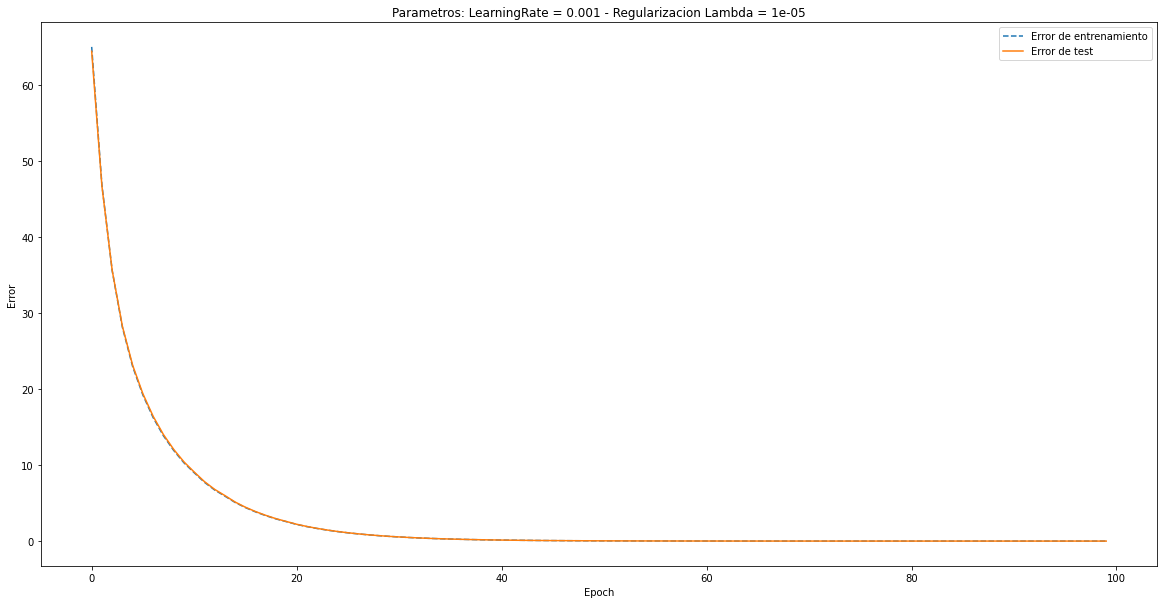

In [49]:
eph = 100
lrate = 0.001
w_ridge, mse_train_ridge, mse_test_ridge = mbgd_r2(x_train, y_train,
                                                      x_test, y_test,
                                                      lr= lrate, epochs=eph, lamb = 1e-5, b = 64)

print(f"Parametros: epochs:{eph}  regularizacion: 1e-5  lr: {lrate}  batches = 64")
print(f"Error de entrenamiento final {mse_train_ridge[eph-1]}")
print(f"Error de testeo final {mse_test_ridge[eph-1]}")
print(w_ridge)

<p style='text-align: justify;'>
$d.$ En lugar de seleccionar manualmente el learning rate y el coeficiente de regularización, utiliza el 10% del dataset de entrenamiento como dataset de validación. Hacer una búsqueda (grid search) de los hiper parámetros que mejor resultado te dan para el ECM sobre el dataset de validación.
    
Luego, utiliza los mejores hiper parámetros para reportar las métricas sobre el dataset de testing.
<p>

In [50]:
def mbgd_r2_v2(x_train_mb, y_train_mb, x_val_mb, y_val_mb, x_test_mb, y_test_mb, lr=0.01, epochs=100, lamb=0.1, b = 16):
    """
    shapes:
        X_t = nxm
        y_t = nx1
        W = mx1
    """
    n = x_train_mb.shape[0]
    m = x_train_mb.shape[1]

    # initialize random weights
    w = np.random.randn(m).reshape(m, 1)
    
    mse_train = []
    mse_val = []
    mse_test = []
    for epoch in range(epochs):
        idx = np.random.permutation(x_train_mb.shape[0])
        x_train_mb = x_train_mb[idx]
        y_train_mb = y_train_mb[idx]

        batch_size = int(len(x_train_mb) / b)
        c = 1 - ((lr*lamb)/batch_size)
        
        for i in range(0, len(x_train_mb), batch_size):
            end = i + batch_size if i + batch_size <= len(x_train_mb) else len(x_train_mb)
            batch_x = x_train_mb[i: end]
            batch_y = y_train_mb[i: end]
            
            batch_y = batch_y.reshape(-1,1) #Con esta linea corrijo el error que tenia debido a las dimensiones de las matrices.
            
            prediction = np.matmul(batch_x, w)  # nx1
            error = batch_y - prediction  # nx1

            grad_sum = np.sum(error * batch_x, axis=0)
            grad_mul = -2/batch_size * grad_sum  # 1xm
            gradient = np.transpose(grad_mul).reshape(-1, 1)  # mx1
             
            w = w*c-lr*gradient
        
        mse_train.append(mse(y_train_mb.reshape(-1,1), np.matmul(x_train_mb, w)))
        mse_val.append(mse(y_val_mb.reshape(-1,1), np.matmul(x_val_mb, w)))
        mse_test.append(mse(y_test_mb.reshape(-1,1), np.matmul(x_test_mb, w)))

    e = np.arange(epochs)

    plt.figure(figsize=(20,10))
    plt.subplot(1, 1, 1)
    plt.gca().set_title(f'Parametros: LearningRate = {lr} - Regularizacion Lambda = {lamb}')
    plt.plot(e, mse_train, '--')
    plt.plot(e, mse_val, '-')
    plt.plot(e, mse_test, 'o')
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.legend(['Error de entrenamiento', 'Error de validacion', 'Error de test'])        
    return w, mse_train, mse_val, mse_test

In [72]:
x_train_mbridge = np.zeros((int(0.7 *len(x)),3))
x_test_mbridge  = np.zeros((int(0.2*len(x)),3))
x_val_mbridge = np.zeros((int(0.1 *len(x)),3))

print(x_train_mbridge.shape)
print(x_test_mbridge.shape)
print(x_val_mbridge.shape)

(7000, 3)
(2000, 3)
(1000, 3)


In [73]:
idx = np.random.permutation(np.arange(0, 10000))

x_train_mbridge[:,0] = x_train_mbridge[:,0] + 1
x_test_mbridge[:,0] = x_test_mbridge[:,0] + 1
x_val_mbridge[:,0] = x_val_mbridge[:,0] + 1

x_train_mbridge[:,1] = x[idx[0:int(0.7*10000)]]
x_test_mbridge[:,1] = x[idx[int(0.7*10000):int(0.9*10000)]]
x_val_mbridge[:,1] = x[idx[int(0.9*10000):]]

x_train_mbridge[:,2] = x[idx[0:int(0.7*10000)]]**2
x_test_mbridge[:,2] = x[idx[int(0.7*10000):int(0.9*10000)]]**2
x_val_mbridge[:,2] = x[idx[int(0.9*10000):]]**2

N_train_mbridge = N[idx[0:int(0.7*10000)]]
N_test_mbridge = N[idx[int(0.7*10000):int(0.9*10000)]]
N_val_mbridge = N[idx[int(0.9*10000):]]

y_train_mbridge = (x_train_mbridge[:,1] - 2)**2 + 3 + N_train_mbridge
y_test_mbridge = (x_test_mbridge[:,1] - 2)**2 + 3 + N_test_mbridge
y_val_mbridge = (x_val_mbridge[:,1] - 2)**2 + 3 + N_val_mbridge

Parametros: epochs:100  regularizacion: 1e-15  lr: 0.001  batches = 64
Error de entrenamiento final 0.040291664247601736
Error de validacion final 0.040917201146039826
Error de testeo final 0.04300699622013555
[[ 6.99321109]
 [-3.99910298]
 [ 1.00189479]]

Parametros: epochs:100  regularizacion: 1e-14  lr: 0.001  batches = 64
Error de entrenamiento final 0.039421111570257364
Error de validacion final 0.03997851692994283
Error de testeo final 0.04201785408155777
[[ 6.99372703]
 [-3.99928316]
 [ 1.00077521]]

Parametros: epochs:100  regularizacion: 1e-13  lr: 0.001  batches = 64
Error de entrenamiento final 0.0393564298350772
Error de validacion final 0.039919370657932794
Error de testeo final 0.041857392309956484
[[ 6.99517856]
 [-3.99926082]
 [ 0.99974455]]

Parametros: epochs:100  regularizacion: 1e-13  lr: 0.001  batches = 64
Error de entrenamiento final 0.03930983541465241
Error de validacion final 0.03986263747563604
Error de testeo final 0.041855877200429596
[[ 6.9939241 ]
 [-3.99

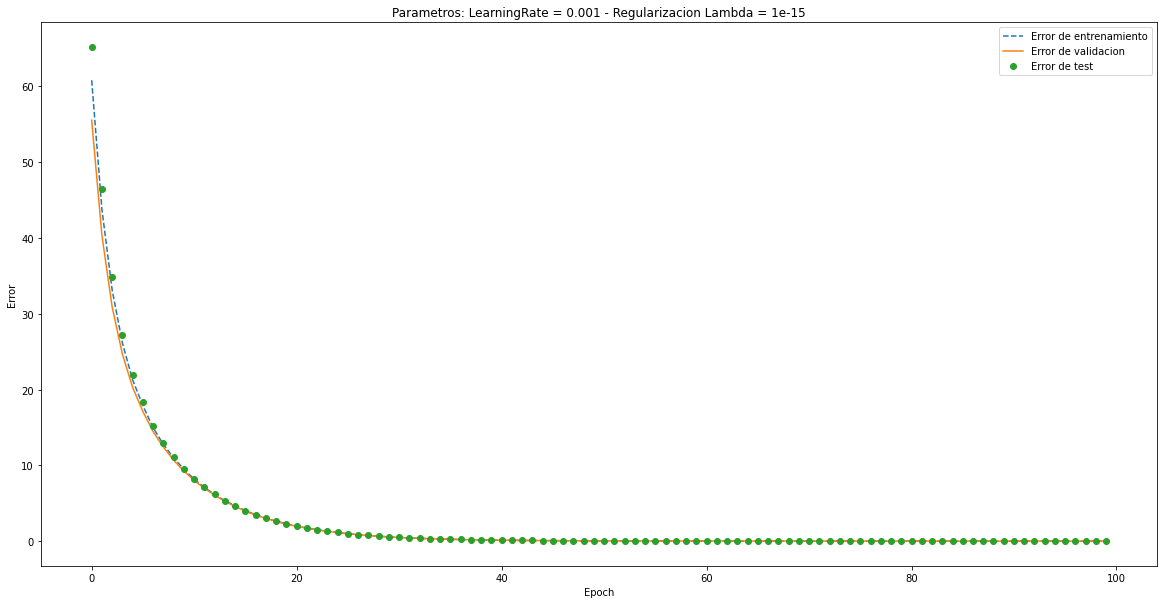

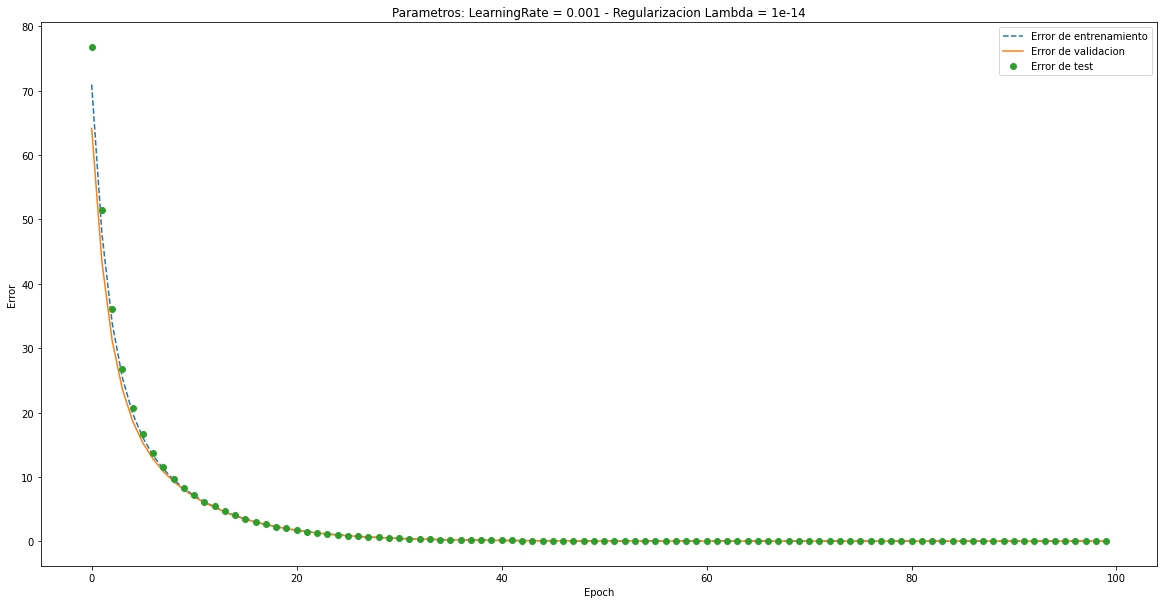

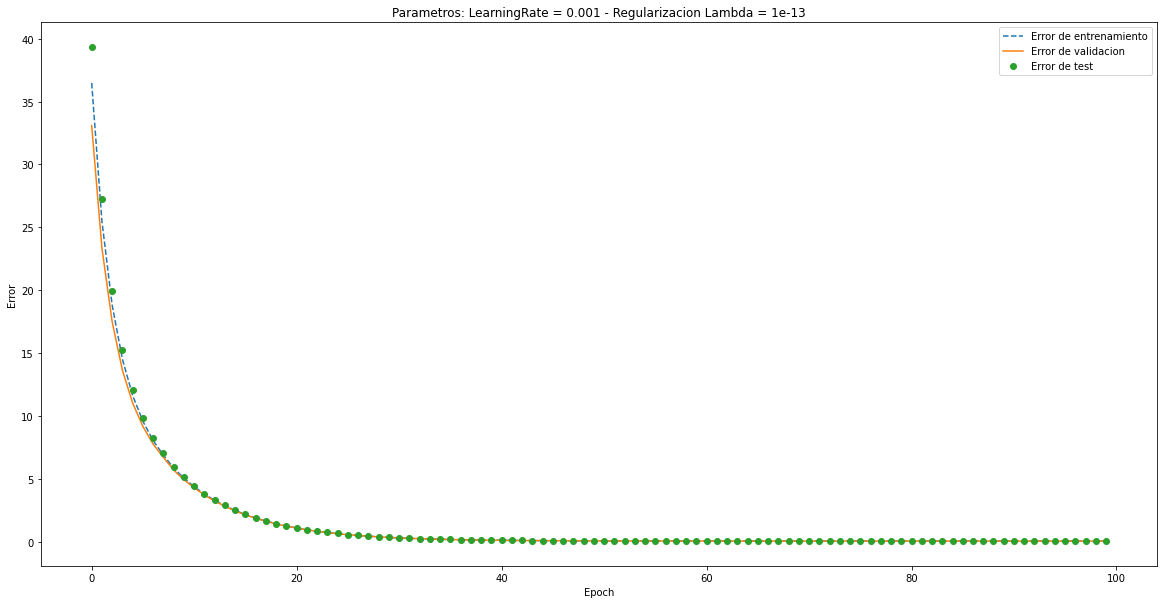

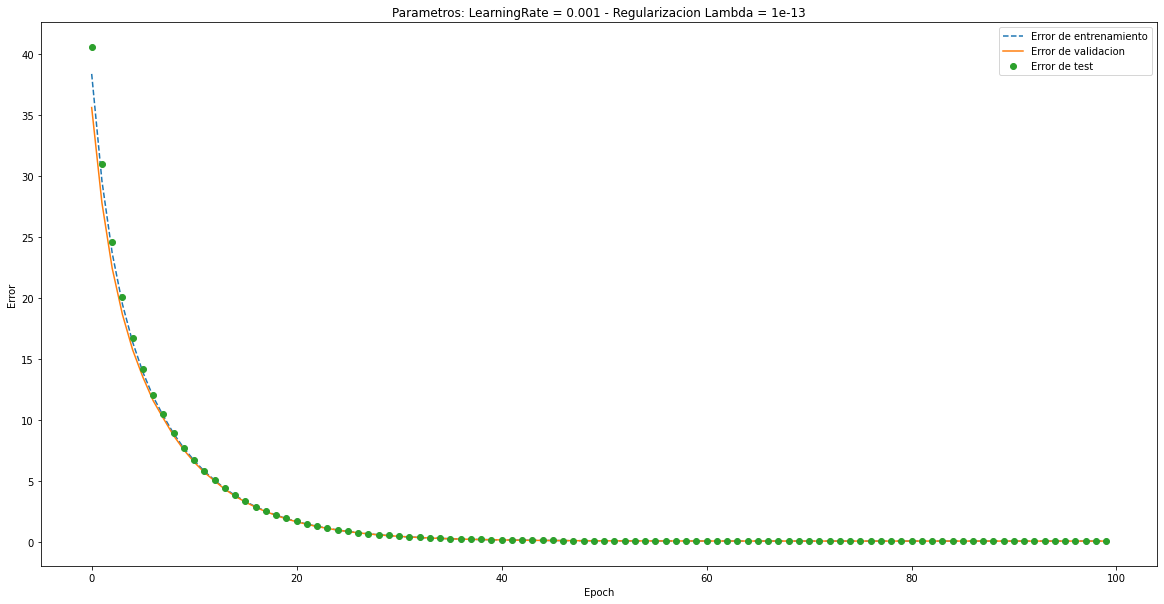

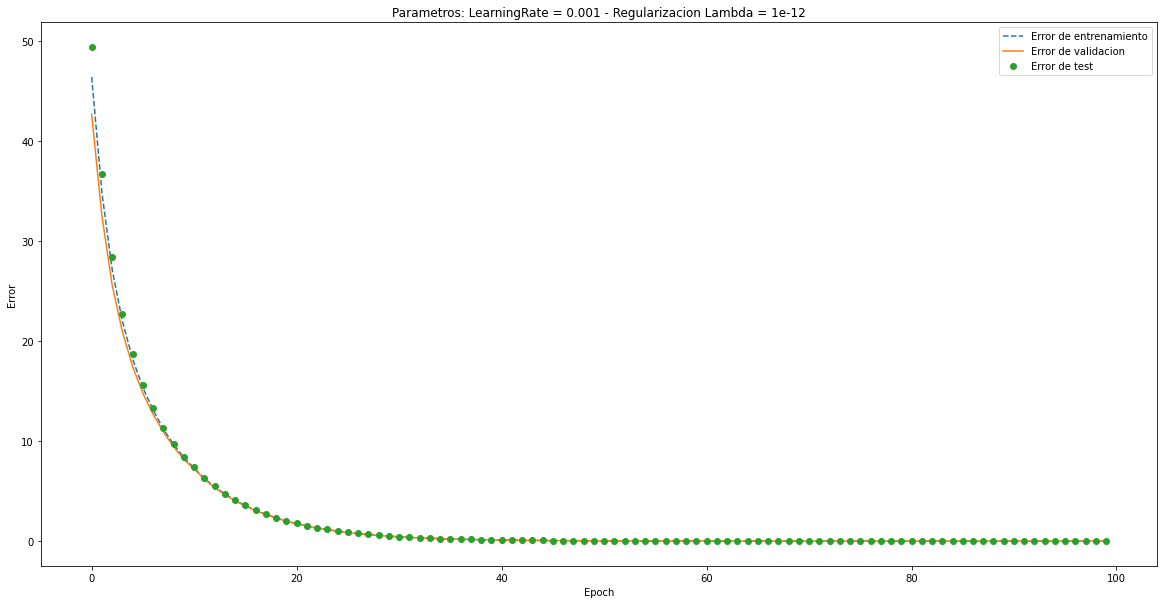

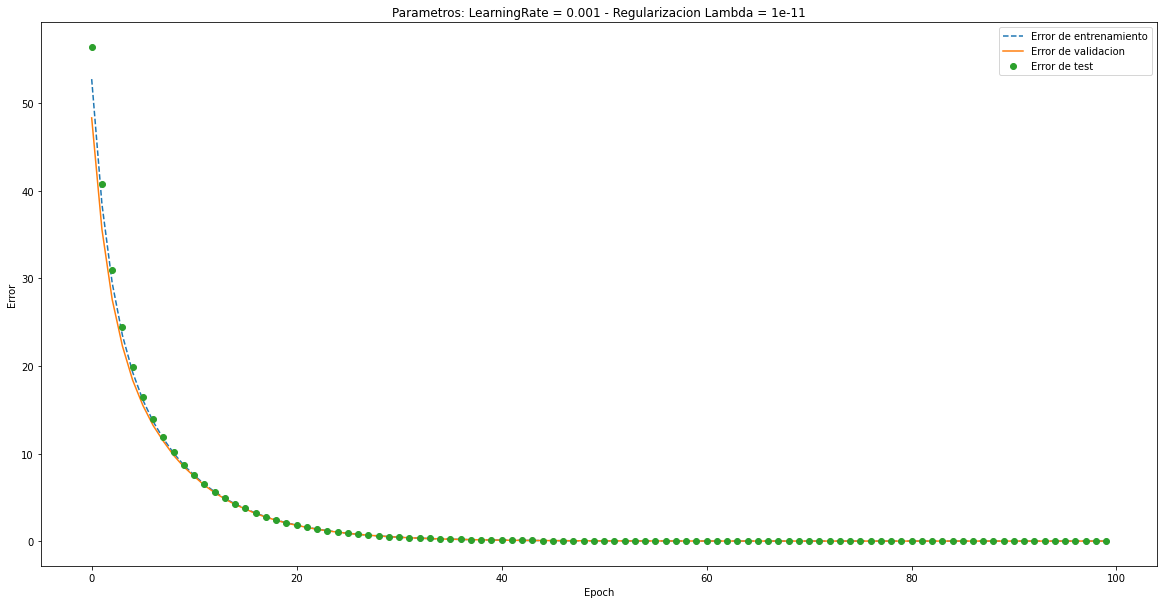

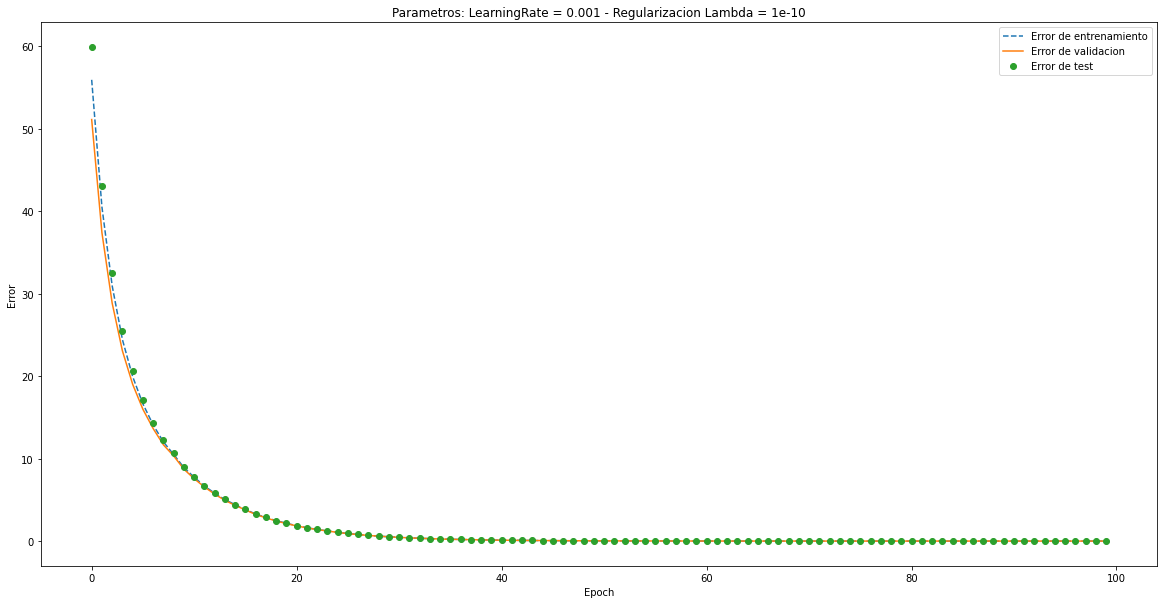

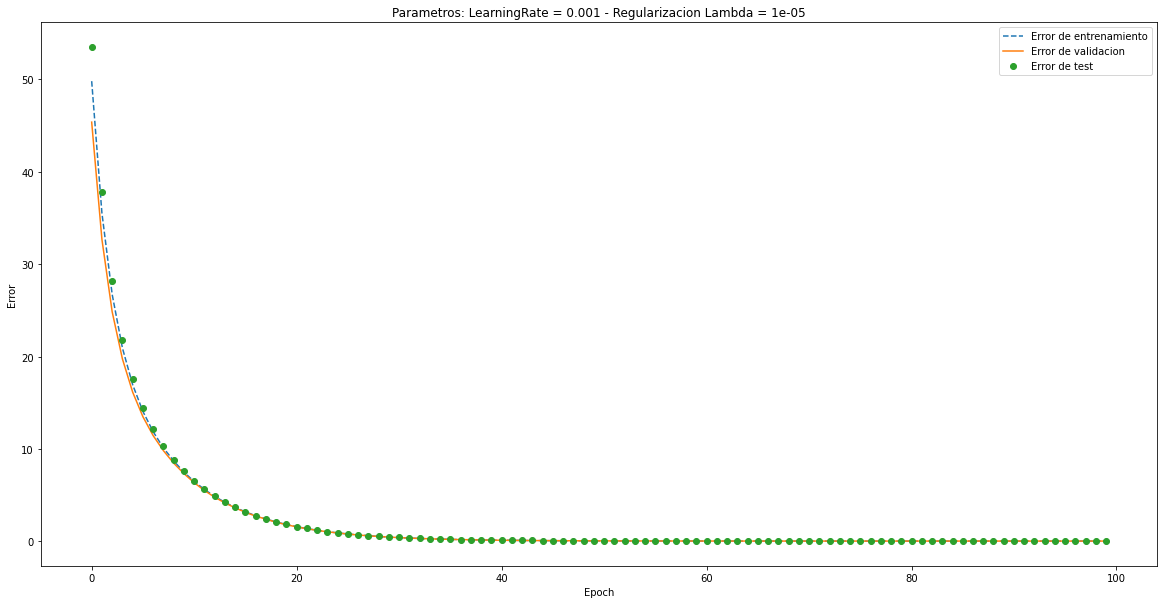

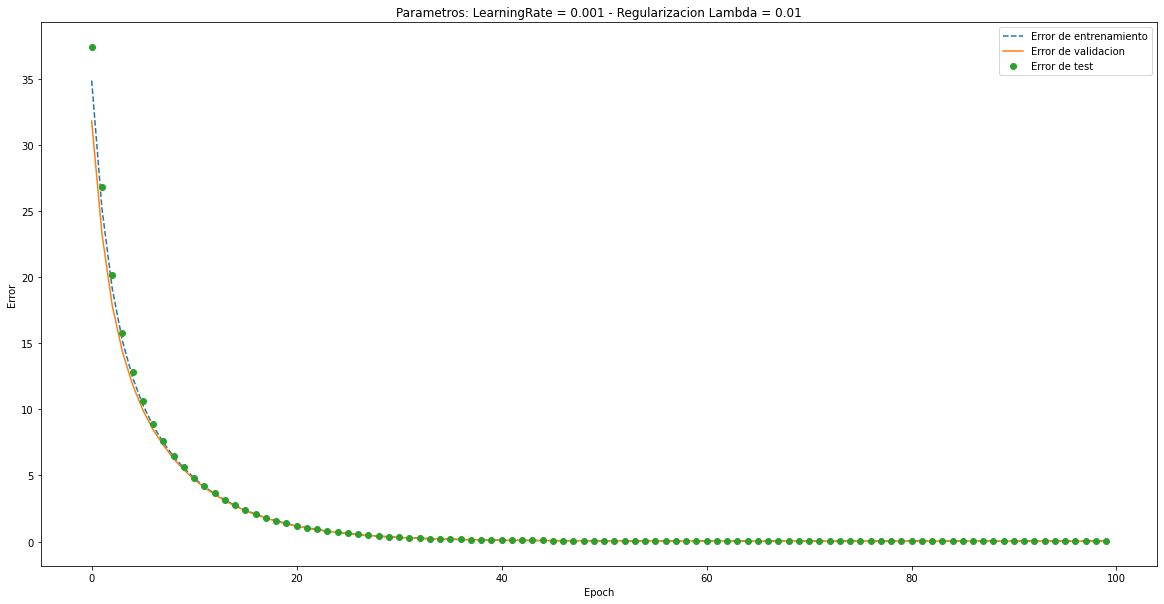

In [80]:
regularizacion = [1e-15,1e-14, 1e-13, 1e-13,1e-12, 1e-11, 1e-10, 1e-5, 1e-2]#, 1, 5, 10]
mse_lamb_test = []
mse_lamb_val = []
mse_lamb_train = []
eph2 = 100
lrate2 = 0.001
for lambd in regularizacion:

    w_ridge, mse_train_ridge, mse_val_ridge, mse_test_ridge = mbgd_r2_v2(x_train_mbridge, y_train_mbridge,
                                                                      x_val_mbridge, y_val_mbridge,
                                                                      x_test_mbridge, y_test_mbridge, 
                                                                      lr=lrate2, epochs=eph2, lamb = lambd, b = 64)
    print(f"Parametros: epochs:{eph2}  regularizacion: {lambd}  lr: {lrate2}  batches = 64")
    print(f"Error de entrenamiento final {mse_train_ridge[eph2-1]}")
    print(f"Error de validacion final {mse_val_ridge[eph2-1]}")
    print(f"Error de testeo final {mse_test_ridge[eph2-1]}")
    print(w_ridge)
    print()
    mse_lamb_test.append(mse_test_ridge[eph2-1])
    mse_lamb_val.append(mse_val_ridge[eph2-1])
    mse_lamb_train.append(mse_train_ridge[eph2-1])

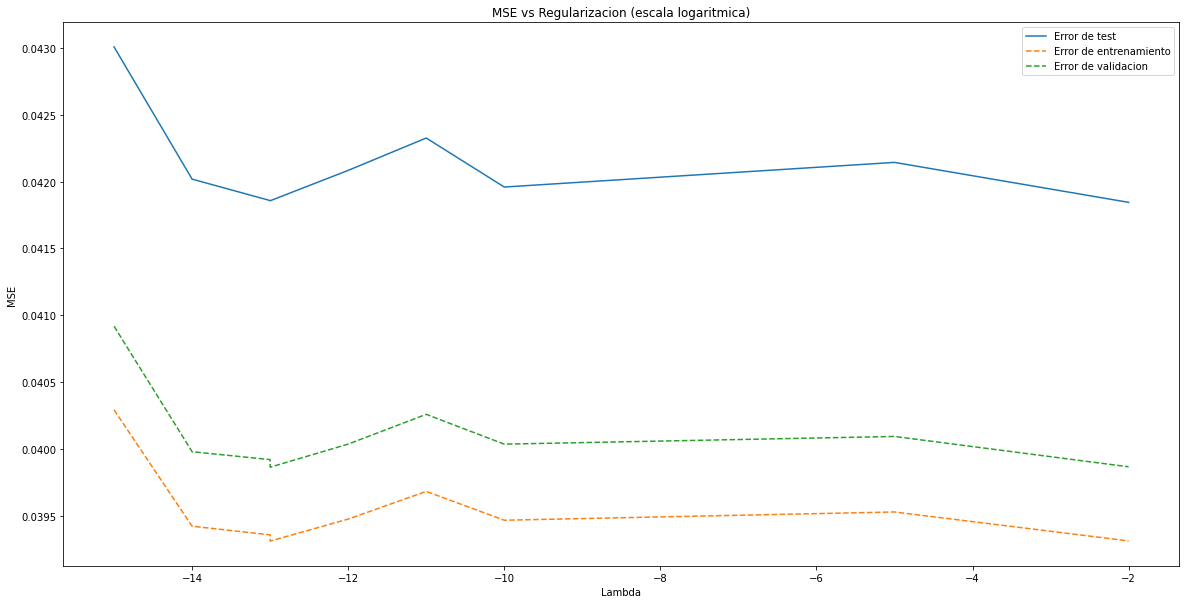

In [81]:
    plt.figure(figsize=(20,10))
    plt.subplot(1, 1, 1)
    plt.gca().set_title('MSE vs Regularizacion (escala logaritmica)')
    plt.plot(np.log10(regularizacion), mse_lamb_test, '-')
    plt.plot(np.log10(regularizacion), mse_lamb_train, '--')
    plt.plot(np.log10(regularizacion), mse_lamb_val, '--')
    plt.xlabel("Lambda")
    plt.ylabel("MSE")
    plt.legend(['Error de test', 'Error de entrenamiento', 'Error de validacion']) 

Si utilizo el error de testeo para encontrar el mejor parametro de regulacion:

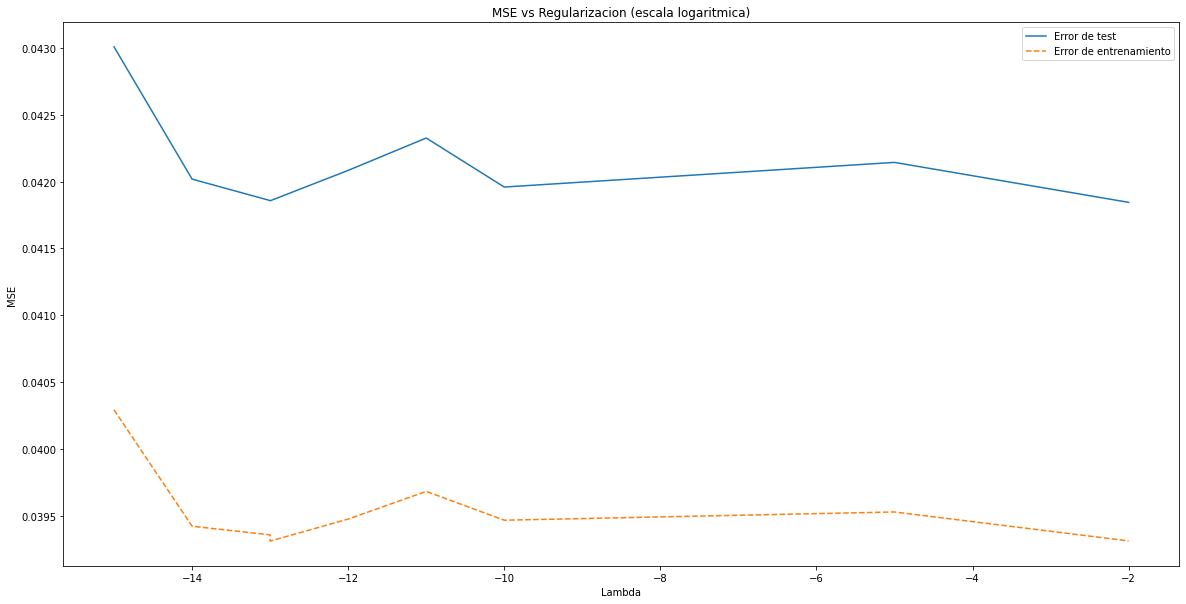

In [82]:
    plt.figure(figsize=(20,10))
    plt.subplot(1, 1, 1)
    plt.gca().set_title('MSE vs Regularizacion (escala logaritmica)')
    plt.plot(np.log10(regularizacion), mse_lamb_test, '-')
    plt.plot(np.log10(regularizacion), mse_lamb_train, '--')
    plt.xlabel("Lambda")
    plt.ylabel("MSE")
    plt.legend(['Error de test', 'Error de entrenamiento']) 